In [3]:
import numpy as np # numerical array library
Ne = 50000  ### Number of equilibration points
Np = 500000 ### Number of production points
Nf = 1    ### Number of files (runs)
### Correlated Decay Processes (rho= memory, amp= amplitude)
rho = [0.05, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85]
amp = 61.0
### Correlated "Jumper" Value
jamp = 5.0 ### Jumper Amplitude
jint = 10000 ### Jumper target interval
rjv = np.random.normal(0.0,jamp) ### Random Jumper value
rji = np.random.randint(1,jint) ### Random Jumper interval

In [4]:
for f in range(Nf): ### For each file ....
  datfile = []
  ov = [0]*len(rho)   ### Old Value
  for j in range (len(rho)):
    ov[j] = np.random.normal(0.0,amp) ### Initialize Correlated decay values
  nv = [0]*len(rho)   ### New Value
  for i in range(Ne+Np): ### For each "simulation" point ....
    sv = 0.0  ### Sum value
    for j in range (len(rho)): ### For each decay process ...
      nv[j] = (rho[j]*ov[j] + (1-rho[j])*np.random.normal(0.0,amp))
      sv += nv[j]
      ov[j] = nv[j]
    if i % rji == 0:  ### Jump the "Jumper"?
      rjv = np.random.normal(0.0,jamp)
      rji = i + np.random.randint(1,jint)
    if i >= Ne:  ### Write the value if we have finished equilibration
      sv += rjv
      datfile.append(sv)

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

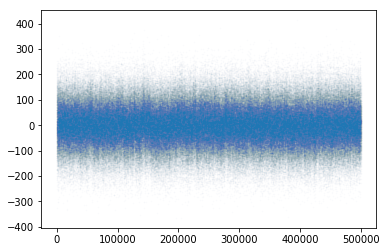

In [11]:
plt.scatter(range(len(datfile)), datfile, s=1, alpha=0.01)

In [12]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[result.size // 2:]


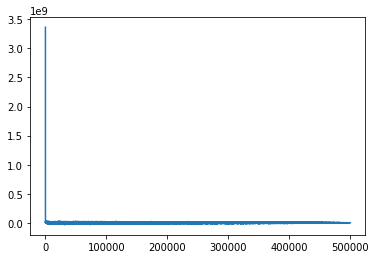

In [14]:
plt.plot(autocorr(datfile))

In [15]:
x = [i for i in range(1000)]

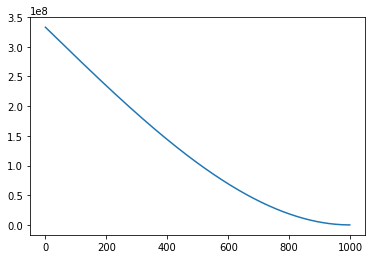

In [18]:
plt.plot(autocorr(x))

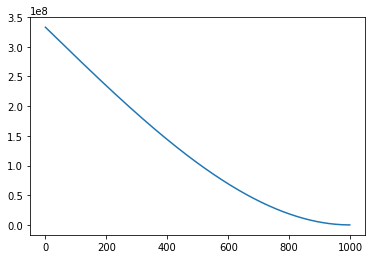

In [19]:
plt.plot(autocorr(x[::-1]))